In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [108]:
df = pd.read_csv(r'..\Data\processed\Merged_Advanced_Stats_2018_2019.csv')

In [109]:
df = df.loc[df['year'] == 2019]

In [110]:
df.head()

,player_id,player_name,pos,year,Date,Week,Age,Tm,Home/Away,Opp,...,Passing_YAC,Passing_Drops,Passing_BadTh,Passing_Bltz,Passing_Hrry,Passing_Hits,Passing_Scrm,std_scoring,ppr_scoring,half_ppr_scoring
4005,McCaCh01,Christian McCaffrey,RB,2019,2019-09-08,1.0,23.093,CAR,Home,LAR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.9,42.9,37.9
4006,McCaCh01,Christian McCaffrey,RB,2019,2019-09-12,2.0,23.097,CAR,Home,TAM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3,7.3,6.3
4007,McCaCh01,Christian McCaffrey,RB,2019,2019-09-22,3.0,23.107,CAR,Away,ARI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.8,27.8,26.3
4008,McCaCh01,Christian McCaffrey,RB,2019,2019-09-29,4.0,23.114,CAR,Away,HOU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.9,33.9,28.9
4009,McCaCh01,Christian McCaffrey,RB,2019,2019-10-06,5.0,23.121,CAR,Home,JAX,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,41.7,47.7,44.7


In [111]:
df['G'] = 1

In [112]:
df_season = df.groupby(['player_name', 'pos', 'Tm'], as_index=False)[['G', 'ppr_scoring']].sum().sort_values('ppr_scoring', ascending=False).reset_index(drop=True)

In [113]:
df_season.head()

,player_name,pos,Tm,G,ppr_scoring
0,Christian McCaffrey,RB,CAR,16,466.20
1,Lamar Jackson,QB,BAL,15,458.68
2,Michael Thomas,WR,NOR,16,371.60
3,Dak Prescott,QB,DAL,16,370.78
4,Russell Wilson,QB,SEA,16,363.60


In [114]:
df_season['pts_per_game'] = df_season['ppr_scoring'] / df_season['G']

In [115]:
df_season.head()

,player_name,pos,Tm,G,ppr_scoring,pts_per_game
0,Christian McCaffrey,RB,CAR,16,466.20,29.137500
1,Lamar Jackson,QB,BAL,15,458.68,30.578667
2,Michael Thomas,WR,NOR,16,371.60,23.225000
3,Dak Prescott,QB,DAL,16,370.78,23.173750
4,Russell Wilson,QB,SEA,16,363.60,22.725000


In [116]:
rb_df = df_season[df_season['pos'] == 'RB']
qb_df = df_season[df_season['pos'] == 'QB']
wr_df = df_season[df_season['pos'] == 'WR']
te_df = df_season[df_season['pos'] == 'TE']

In [117]:
qb_df.head()

,player_name,pos,Tm,G,ppr_scoring,pts_per_game
1,Lamar Jackson,QB,BAL,15,458.68,30.578667
3,Dak Prescott,QB,DAL,16,370.78,23.173750
4,Russell Wilson,QB,SEA,16,363.60,22.725000
5,Deshaun Watson,QB,HOU,15,334.98,22.332000
6,Patrick Mahomes,QB,KAN,14,327.04,23.360000


In [118]:
def get_top_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, ['ppr_scoring']).min()).reset_index(drop=True)

qb_df = get_top_players(qb_df, 1)
te_df = get_top_players(te_df, 1)
rb1_df = get_top_players(rb_df, 1)
rb2_df = get_top_players(rb_df, 2)
wr1_df = get_top_players(wr_df, 1)
wr2_df = get_top_players(wr_df, 2)
wr3_df = get_top_players(wr_df, 3)

new_names = {
    'QB1': qb_df,
    'TE1': te_df,
    'RB1': rb1_df,
    'RB2': rb2_df,
    'WR1': wr1_df,
    'WR2': wr2_df,
    'WR3': wr3_df
}

for name, new_df in new_names.items():
    new_df.rename({'pts_per_game': name}, axis=1, inplace=True)
    new_df.drop(['pos', 'ppr_scoring', 'player_name', 'G'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1, sort=True)

In [119]:
wr_df.loc[wr_df['Tm'] == 'NYJ']

,player_name,pos,Tm,G,ppr_scoring,pts_per_game
72,Jamison Crowder,WR,NYJ,16,197.7,12.356250
101,Robby Anderson,WR,NYJ,16,157.3,9.831250
193,Demaryius Thomas,WR,NYJ,11,85.3,7.754545
271,Vyncint Smith,WR,NYJ,13,47.7,3.669231


In [120]:
corrMatrix = df.corr()

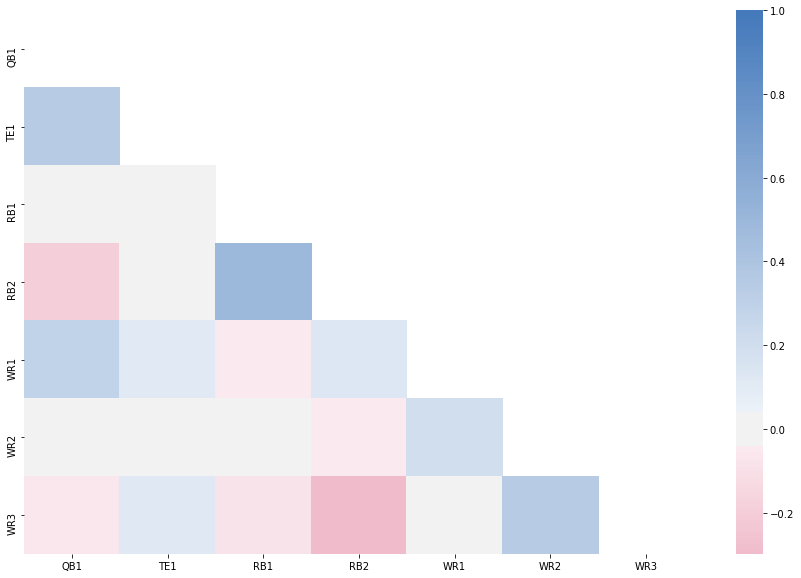

In [121]:
#correlation matrix showing positions

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.diverging_palette(0, 250, as_cmap=True)

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask,cmap=cmap, center=0)


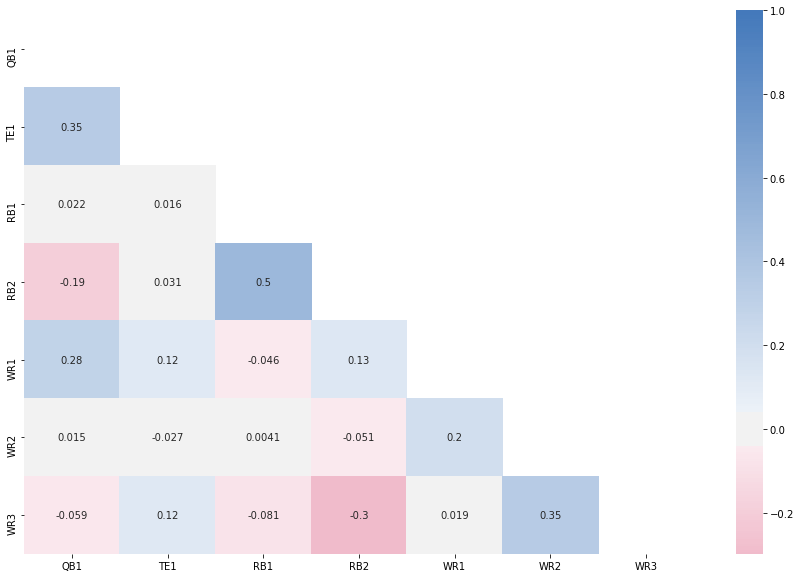

In [126]:
#with data labels

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)


vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask,cmap=cmap, center=0, annot=True)